# Graia MNIST digits example

In [1]:
# %pip install numpy
# %pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt

# to get the MNIST digits
# %pip install tensorflow
import tensorflow as tf
import tensorflow.keras

2024-04-12 16:05:39.380771: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-12 16:05:39.383355: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-12 16:05:39.415167: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-12 16:05:40.116818: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Graia
# %pip install pyopencl
# %pip install pocl-binary-distribution
# %pip install futhark-ffi
from graia import Graia

🌄 Graia v0.0.1


In [3]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# print(train_labels[0])
# plt.imshow(train_images[0])

In [4]:
N = 6000
train_images = train_images[:N]
train_labels = train_labels[:N]
train_images = train_images.reshape(N, 28*28)

In [5]:
model = Graia(inputs=28*28, layer_nodes=128, layers=3, outputs=10, seed=37)
# plt.imshow(model.hidden_weights[0])
# print(model.hidden_weights[0])

🌄 Graia model with 134,400 parameters ready.


In [6]:
model.fit(train_images, train_labels, epochs=5)


Epoch 1/5: accuracy 8.917%
Epoch 2/5: accuracy 8.917%
Epoch 3/5: accuracy 10.133%
Epoch 4/5: accuracy 10.133%
Epoch 5/5: accuracy 10.133%


In [7]:
print("\n", model.input_weights[:2], "...")
print("\n", model.hidden_weights[0])
print("\n", model.output_weights[:2], "...")



 [[-6  4  3 ... -5  5 -7]
 [-1 -4 -8 ... -1 -2  2]] ...

 [[-6  1  5 ... -7  6 -4]
 [ 3  2  2 ...  8 -3 -1]
 [-2 -7 -2 ... -8 -4  2]
 ...
 [-7 -7  1 ... -2 -1  5]
 [-1  8 -2 ...  4  1 -3]
 [ 8 -7  7 ...  7  3  2]]

 [[ 2  1 -6 -4  7 -3 -8  4  5  3 -6  8  8 -5 -8  5 -5 -5  6  8  7  1  3  5
  -1  3  5 -6  3 -7  6 -6 -2  4  5  8 -3 -8 -8 -2 -6 -4 -4 -3 -8  5 -1 -3
   4  4 -2 -6  1  6  3  8  6  5 -5 -6 -4 -2 -4  3 -8 -5  8 -5 -5 -4 -4  4
  -6 -5  1  2 -5 -3  4 -1 -1 -3 -1  4  5 -7  8  6 -5 -1 -8 -1 -8  6  2 -8
  -6 -1  1  1  6 -4 -2 -1 -5 -6 -6 -5 -6  8 -4 -7 -6 -2 -7 -2 -3 -4 -5  7
   4 -3 -7 -4  6 -3 -2 -4]
 [ 6  4  4  1  5  8  1  5  5  4  4  6  4 -4  8  5 -2  4 -3 -3 -7 -3 -4  5
  -8 -2  8 -1  3 -8 -8  6  3 -3 -4 -3  8  4  3  7  3 -6  4  2 -3  5 -4  8
   6  6  5 -4  2  3 -3  3  6 -5  2 -3  8 -4 -5 -8 -8 -4  8 -3  8  2  5  3
   7  1 -1  2 -3 -1  5  1 -5  7  4 -3  6  5  6 -7 -2 -3  8  1 -8  2  5  4
   6 -4 -5 -4 -7 -5  3 -6 -3 -6  3  1 -4  8  4 -4  3  2  7 -6  5 -7 -1  8
   3  1 -3  6 -8


 [  6   0   0  29  42   0   0   0   0  34   0   0   0  13   0  12   0   0
  10  31   0   0  15   2   0  36   0  28   0  13  66   0  75   2  30   0
   0   0   0  81   0  73  20   0   0  43   0   0   0   0   0   0   0   0
  20  47  60   0  50   0   0   3  26   0  48  11   5   8   0   0   5   0
  25  54   0 127  80  24   8   0   0  15   0   0  47  88   0   0  27  59
  16   5   0   0  78  49  29   0   0   0  71  98   0  73 107   0  17   0
   0   6  11  50  20   0   0   0   0  66  99  71   0   0   0  46  18   0
  77  25]


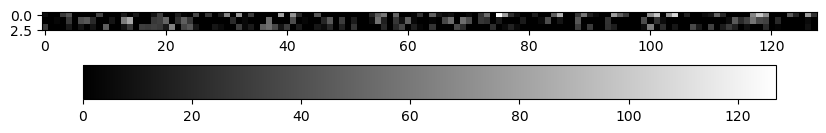


 [ 0  0  0 21  2  0 19  0 21  0]


In [8]:
plt.figure(figsize = (10,3))
plt.imshow(model.last_intermediate_outputs, cmap="grey")
plt.colorbar(orientation="horizontal")
print("\n", model.last_intermediate_outputs[0])
plt.show()
print("\n", model.last_outputs)